# Plot $\zeta_\pi$ which accounts for the movement of the proton in the deuteron
last edit Nov-25, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [21]:
[e_e_pi, 
 e_e_pi_n,
 e_e_pi_FreeP] = load_SIDIS_data( Nruns          = -1, #Nruns          = 15,#-1, 
                                       subdirname      = "sidisdvcs_27Oct2022_commit_2fe215f",
                                       taggedsubdirname= "sidisdvcs_25Nov2022_commit_5b2a758",
                                       do_e_e_pi       = True, 
                                       do_e_e_pi_n     = True, 
                                       do_e_e_pi_FreeP = True, 
                                       do_all_vars     = True, 
                                       fdebug          = 4);
print('Done loading data.')
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,e_e_pi_FreeP_pass_cuts,_ = apply_further_selection_cuts_to_data(fdebug=0);
print('Done applying selection cuts.')

Run number  6421 (1/86 runs)
Loaded 385297  d(e,e'π+) events
Loaded 46  d(e,e'π+n) events
Loaded 162638  d(e,e'π-) events
Loaded 21  d(e,e'π-n) events
Run number  6422 (2/86 runs)
Loaded 366918  d(e,e'π+) events
Loaded 64  d(e,e'π+n) events
Loaded 154361  d(e,e'π-) events
Loaded 28  d(e,e'π-n) events
Run number  6426 (3/86 runs)
Loaded 326566  d(e,e'π+) events
Loaded 29  d(e,e'π+n) events
Loaded 137027  d(e,e'π-) events
Loaded 13  d(e,e'π-n) events
Run number  6429 (4/86 runs)
Loaded 411636  d(e,e'π+) events
Loaded 63  d(e,e'π+n) events
Loaded 172739  d(e,e'π-) events
Loaded 17  d(e,e'π-n) events
Run number  6430 (5/86 runs)
Loaded 78744  d(e,e'π+) events
Loaded 8  d(e,e'π+n) events
Loaded 33100  d(e,e'π-) events
Loaded 4  d(e,e'π-n) events
Run number  6431 (6/86 runs)
Loaded 320743  d(e,e'π+) events
Loaded 52  d(e,e'π+n) events
Loaded 135621  d(e,e'π-) events
Loaded 17  d(e,e'π-n) events
Run number  6432 (7/86 runs)
Loaded 400648  d(e,e'π+) events
Loaded 57  d(e,e'π+n) events
Loaded 1

# (2) plot $z_\pi$ and $\zeta_\pi = \frac{ \alpha_\pi }{ \alpha_p  } = \frac{ \alpha_\pi }{ 2 - \alpha_n }$

## (2.1) 1d distributions 

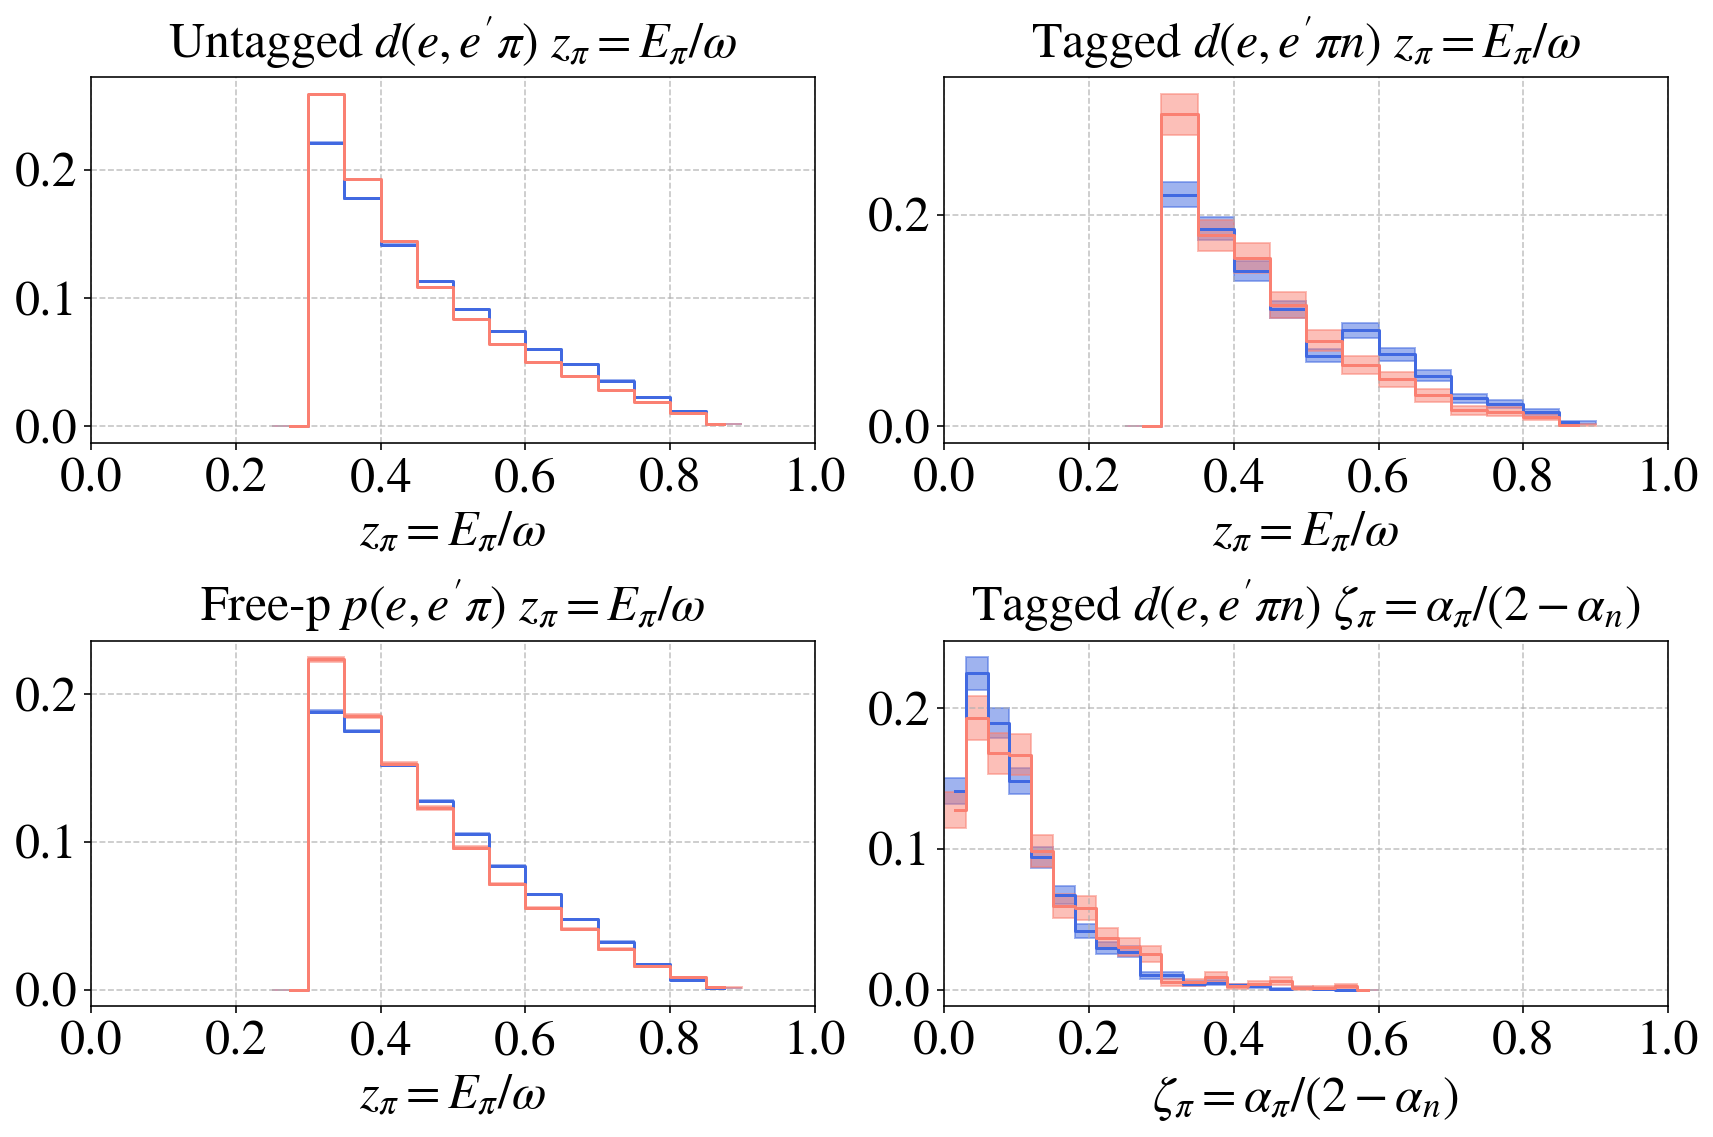

In [50]:
z_bins    = np.arange(0.25,0.95, 0.05)
zeta_bins = np.linspace(0,  0.6, 21)
xlim      = (0,1)
fig = plt.figure(figsize=(12,8),tight_layout=True)
varunits = ""

# top left: z for untagged data 
# top right: z for tagged data 
var,varlabel = "Zpi","$z_\pi = E_\pi/\omega$"
for df_dict,df_label,df_idx,bins in zip([e_e_pi_pass_cuts,e_e_pi_n_pass_cuts],
                                        ["Untagged $d(e,e'\pi)$","Tagged $d(e,e'\pi n)$"],
                                        [1,2],
                                        [z_bins,z_bins]):
    ax = fig.add_subplot(2,2,df_idx)
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):                                                       
        df = df_dict[pi_ch]
        [x,h,x_err,h_err] = plot_step_squares(df[var],ax=ax,
                                              bins=bins,
                                              density=True,color=pi_color,
                                              alpha=0.5,label="$d(e,e'"+pi_label+")$" )
        ax.step(x,h,'-',where='mid', color=pi_color )
    set_axes(ax,varlabel + " " + varunits,
             'Frequency [a.u.]' if pi_idx==1 else '',
             title= df_label + " "+ varlabel,
             do_add_grid=True, 
             do_add_legend=False,
             xlim=xlim);  
    plt.locator_params(axis='y', nbins=3)

    
# Bottom left: z for free proton
# Bottom right: zeta for tagged data 
for df_dict,df_label,df_idx,var,varlabel,bins in zip([e_e_pi_FreeP_pass_cuts,e_e_pi_n_pass_cuts],                       
                                                     ["Free-p $p(e,e'\pi)$","Tagged $d(e,e'\pi n)$"],
                                                     [1,2],
                                                     ["Zpi","zeta_pi"],
                                                     ["$z_\pi = E_\pi/\omega$","$\zeta_\pi = \\alpha_\pi/(2-\\alpha_n)$"],
                                                     [z_bins,zeta_bins]):
    ax = fig.add_subplot(2,2,2+df_idx)
    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):                                                       
        df = df_dict[pi_ch]
        [x,h,x_err,h_err] = plot_step_squares(df[var],ax=ax,
                                              bins=bins,
                                              density=True,color=pi_color,
                                              alpha=0.5,label="$d(e,e'"+pi_label+")$" )
        ax.step(x,h,'-',where='mid', color=pi_color )
    set_axes(ax,varlabel + " " + varunits,
             'Frequency [a.u.]' if pi_idx==1 else '',
             title = df_label + " "+ varlabel,
             do_add_grid=True, 
             do_add_legend=False,
             xlim=xlim);
    plt.locator_params(axis='y', nbins=3)

## (2.2) $\zeta$ vs $z$ for tagged data

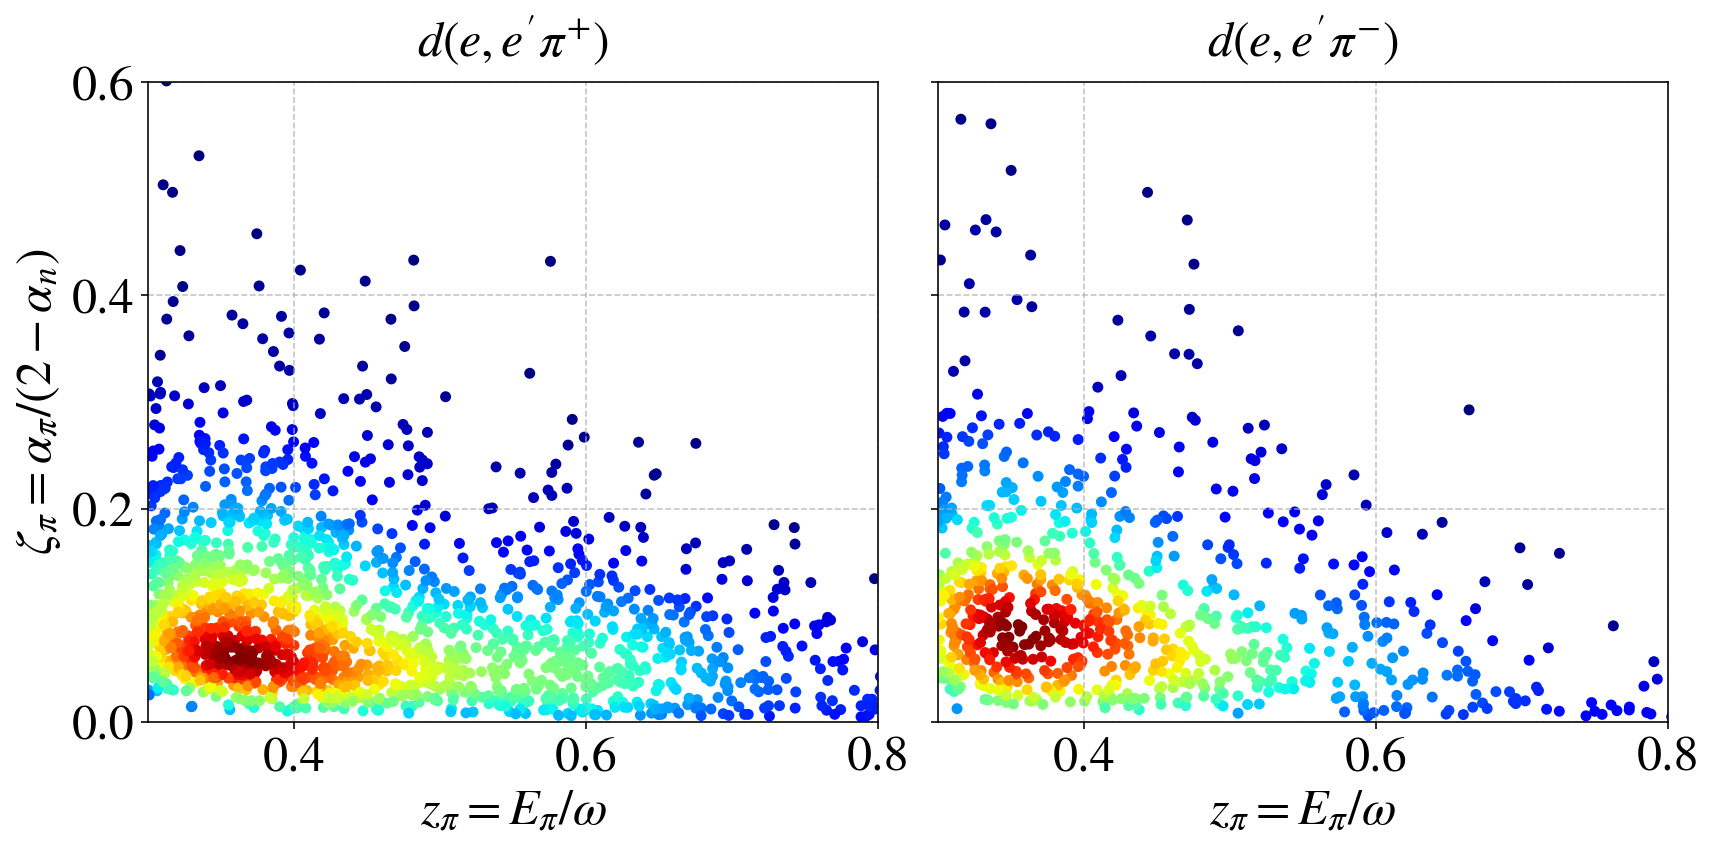

In [69]:
fig = plt.figure(figsize=(12,6),tight_layout=True)

xlim = (0.3,0.8)
ylim = (0,0.6)

df_dict = e_e_pi_n_pass_cuts
var_x = "Zpi"
var_y = "zeta_pi"
varlabel_x = "$z_\pi = E_\pi/\omega$"
varlabel_y = "$\zeta_\pi = \\alpha_\pi/(2-\\alpha_n)$"
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                   pi_labels,pi_colors,[1,2]):                                                       
    df = df_dict[pi_ch]
    ax = fig.add_subplot(1,2,pi_idx)

    scatter_plot_with_kernel(df[var_x],df[var_y], s=20)
    # ax.scatter(df[var_x],df[var_y],color=pi_color)
    
    set_axes(ax,
             varlabel_x,
             varlabel_y if pi_idx==1 else '', 
             remove_ticks_y=False if pi_idx==1 else True, 
             title = "$d(e,e'"+pi_label+")$",
             do_add_grid=True, 
             # ticks_color=pi_color,
             do_add_legend=False, xlim=xlim, ylim=ylim);    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)

## additional figures

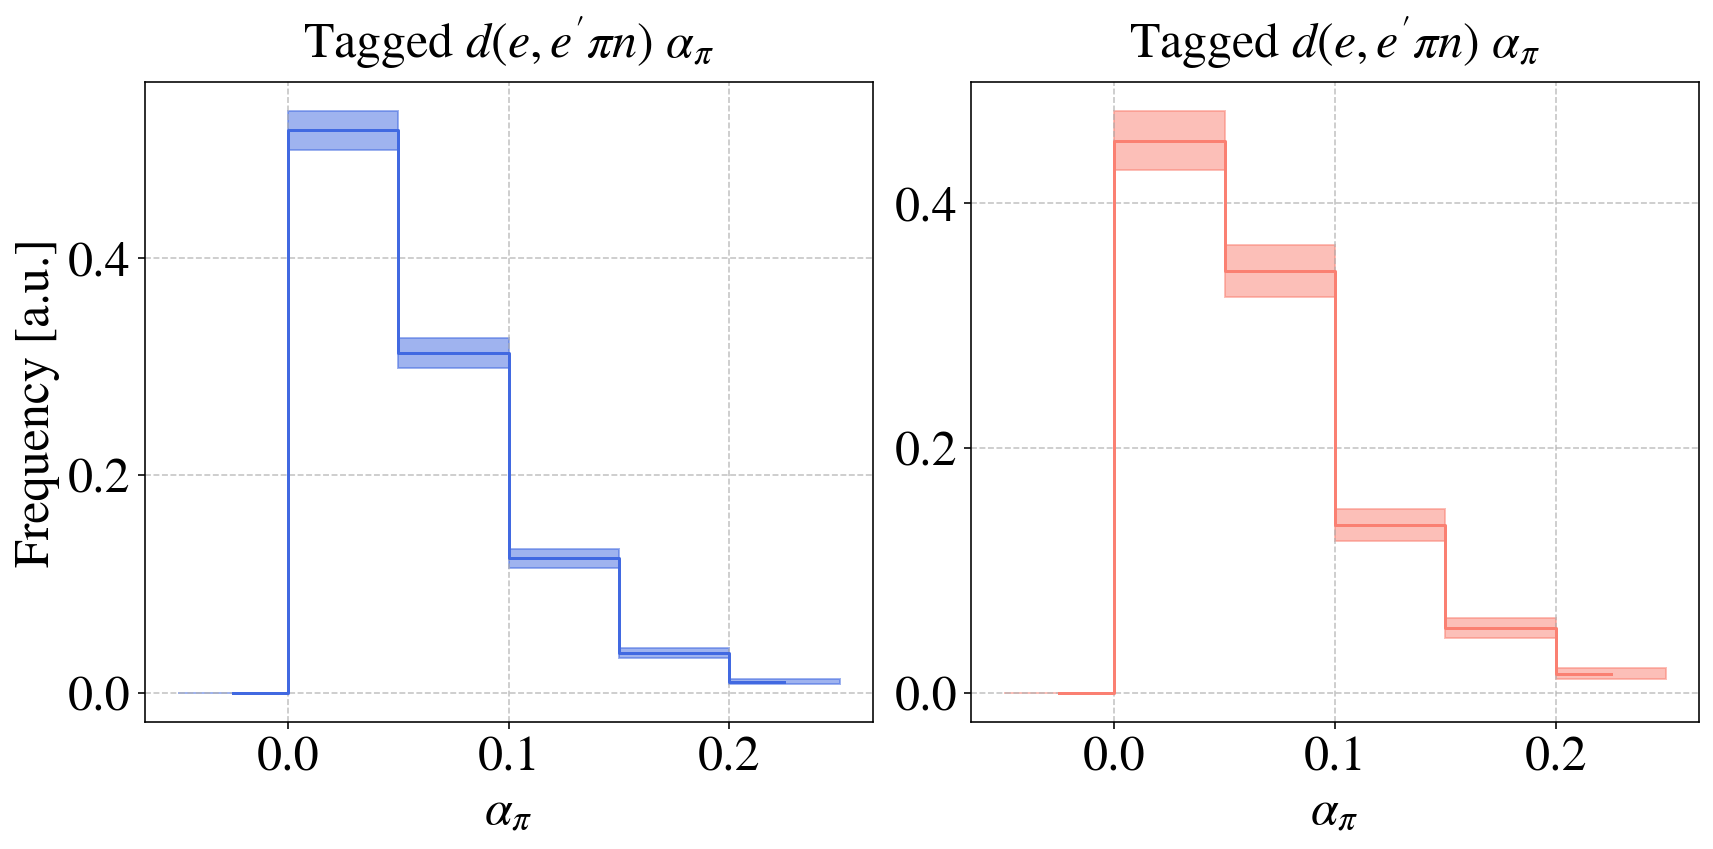

In [77]:
bins    = np.arange(-0.05,0.3, 0.05)
xlim    = (0,1)
fig = plt.figure(figsize=(12,6),tight_layout=True)
varunits = ""

# top left: z for untagged data 
# top right: z for tagged data 
df_dict = e_e_pi_n_pass_cuts
var,varlabel = "alpha_pi","$\\alpha_\pi$"
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,
                                                       pi_labels,pi_colors,[1,2]):                                                       
    ax = fig.add_subplot(1,2,pi_idx)

    df = df_dict[pi_ch]
    [x,h,x_err,h_err] = plot_step_squares(df[var],ax=ax,
                                              bins=bins,
                                              density=True,color=pi_color,
                                              alpha=0.5,label="$d(e,e'"+pi_label+")$" )
    ax.step(x,h,'-',where='mid', color=pi_color )
    set_axes(ax,varlabel + " " + varunits,
             'Frequency [a.u.]' if pi_idx==1 else '',
             title= df_label + " "+ varlabel,
             do_add_grid=True, 
             do_add_legend=False);  
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)